In [27]:
import stlab
import stlabutils
import numpy as np
import pickle
import multiprocessing as mp
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.titlesize'] = 22
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18
mpl.rcParams['legend.fontsize'] = 16
mpl.rcParams['figure.titlesize'] = 22
mpl.rcParams['lines.linewidth'] = 2

# Give colours in hex
qubit     = '#664277'  # qubit
cavity1   = '#fa476f'  # cavity 1
cavity2   = '#c86464'  # cavity 2
coupling1 = '#68b799'  # coupling between qubit and cavity 1
coupling2 = '#7eb6a1'  # coupling between qubit and cavity 1
drive     = '#68b799'  # single-tone drive strength
driveq    = 'green'    # qubit-friendly drive tone strength
drivec    = 'cyan'     # cavity-friendly drive tone strenth
sbred     = '#c86464'  # P(e0)-P(g1), red sideband transitions
sbblue    = '#6196b3'  # P(e1)-P(g0), blue sideband transitions
hline     = 'gray'     # horizontal domain lines
colormap  = 'gist_heat'   # colormap for color plots

In [38]:
# Specify the path to your data file
folder = '/home/jovyan/steelelab/measurement_data/newBF/Wouter/Wouter_thesis_rsb_data_handover/'
file = 'B_2019_12_27_01.48.51_Resonator_split_Singletone-sideband-LT142W4_5D_C_40dB.dat'
filepath = folder + file

# Load the data
data = stlabutils.readdata.readdat(filepath)

x = np.asarray(data[0]['Frequency (Hz)'])*1e-9
y = np.linspace(1.340e9, 1.349e9, 10)*1e-9
z = np.zeros([y.shape[0], x.shape[0]])
for i, line in enumerate(data[:-1]):
    line['S21_lin ()'] = (line['S21re ()']**2 + line['S21im ()']**2)
    z[i] = np.asarray(line['S21_lin ()'])

fit_file = open('/home/jovyan/jupyterhub-shared/Wouter/RSB_fit.pkl', 'rb')
fit_dict = pickle.load(fit_file)
xfit = np.asarray(fit_dict['x'])*1e-9
yfit = fit_dict['y']
fit_file.close()

['Frequency (Hz)', 'S21re ()', 'S21im ()', 'S21dB (dB)', 'S21Ph (rad)', 'Power (dBm)']


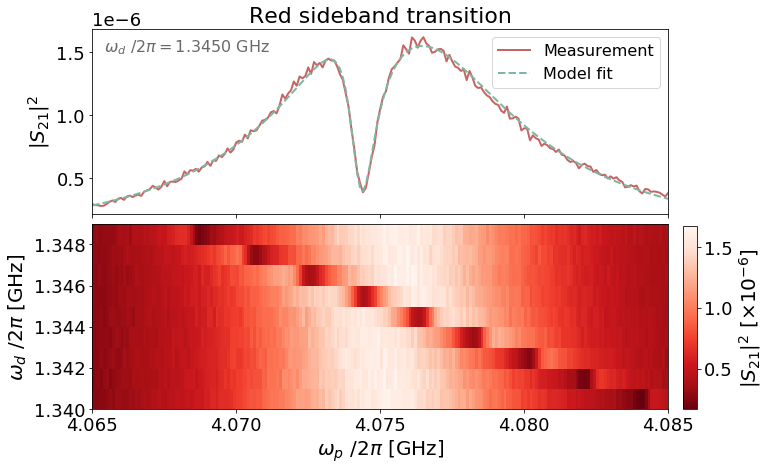

In [42]:
fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(10,7))

axes[0].plot(x, z[5], c=sbred, label="Measurement")
axes[0].plot(xfit, yfit, '--', c=coupling2, label="Model fit")
# axes[0].set_xlim([4.06, 4.09])
# axes[0].set_xticks([4.06, 4.07, 4.08, 4.09])
# axes[0].set_ylim([0, 2.7e-8])
axes[0].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axes[0].set_ylabel("$|S_{{21}}|^2$")
axes[0].set_title("Red sideband transition")
axes[0].text(4.0654, 1.5e-6, "$\\omega_d$ $/2\\pi = 1.3450$ GHz", color='dimgrey')
axes[0].legend(loc='upper right')

cplot = axes[1].pcolor(x, y, z*1e6, cmap='Reds_r')
axes[1].set_xticks([4.065, 4.07, 4.075, 4.08, 4.085])
# axes[1].set_yticks([5.41, 5.4105, 5.411, 5.4115])
axes[1].set_xlabel("$\\omega_p$ $/2\\pi$ [GHz]")
axes[1].set_ylabel("$\\omega_d$ $/2\\pi$ [GHz]")

fig.subplots_adjust(left=0.07, right=0.87)
box = axes[1].get_position()
pad, width = 0.02, 0.02
cax = fig.add_axes([box.xmax + pad, box.ymin, width, box.height+0.02])
fig.colorbar(cplot, cax=cax, label='$|S_{{21}}|^2$ [$\\times 10^{{-6}}$]')

fig.subplots_adjust(hspace=0.05)
plt.show()